In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from airbnb_priceforecaster.data import AirBnBDataset

# Exploring the AirBnB listings

The aim is to get an understanding of how each feature is distributed - taking note of the following:

- Missing values
- Categorical or continuous?
- Skewed distributions



# Downloading the data

# Datatypes

In [6]:
dataset = AirBnBDataset(year=2020, month=5, day=30)

In [8]:
dataset.download_data()

Getting data from http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-05-30/data/listings.csv.gz...
Data downloaded, unzipping...
Done fetching data!


In [9]:
df = pd.read_csv("../data/raw/listings_2020_05_30.csv", dtype={"zipcode": "string"})

/home/anders/.pyenv/versions/3.8.3/envs/priceforecaster/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df.columns[43], df.columns[61], df.columns[62], df.columns[94]

('zipcode', 'weekly_price', 'monthly_price', 'license')

We start by eliminating columns we know we don't need - we can always include them later if need be.

## ID
Id is the unique ID of the column - don't need that
- drop

## listing_url
The url that was scraped
- drop

## scrape_id
ID of the scrape
- drop

## last_scraped
When that record was last scraped
- drop

## name
The name of the listing - a short message designed to attract the potential renter
- drop

## summary
A summary of the property - a paragraph with some information about the listing. Another project could be to predict whether the info page could be improved.
- drop

## space
A description of the living space
- drop

## description
Long form description
- drop

## experiences_offered
Whether or not the host offers any experiences - is all none in this dataset
- drop

## neighborhood_overview
Describing the local neighborhood. Could be relevant for extracting some features about the neighborhood that are not present in the other data e.g. if bars + cafes are often mentioned, this could be used to tag all other listings in that neighborhood. Would be more advanced feature.
- drop

## notes
Any special mentions that the host wants to point out
- drop

## transit
A host-provided text describing about what kind of transit is available. Probably better to get that information from geo-coding
- drop

## access
A host-provided text describing how much of the property is available
- drop

## interaction
A host-provided text describing how much they will be around
- drop

## house_rules
What rules the guest must follow. Would try to extract some simple rules such as smoking allowed or similar
- keep

## thumbnail_url
URL to the picture. Later could do some image feature extraction.
- drop

## medium_url
URL to the picture. Later could do some image feature extraction.
- drop

## picture_url
URL to the picture. Later could do some image feature extraction.
- drop

## xl_picture_url
URL to the picture. Later could do some image feature extraction.
- drop


## host_id
ID of the host
- drop

## host_url
URL to the host page
- drop
## host_name
Name of the host
- drop

## host_since
When started hosting. Hypothesis that being a host for longer affects the price - they might be able to charge a different price.
For our solution, we can set it to 0 or ask.
- keep

## host_location
Where the host is located. Hypothesis that the host being somewhere else affects the price
- keep

## host_about
Text giving a description of who the host is.
- drop

## host_response_time
How long does it take for the host to accept/decline an offer. Hypothesis that this could be an indicator of "seriousness" which could affect the price
- keep

## host_response_rate
How many requests does the host respond to. Hypothesis that this could be an indicator of "seriousness" which could affect the price
- drop

## host_acceptance_rate
Out of all requests, how many are accepted. Hypothesis that this could be an indicator of "seriousness" which could affect the price
- drop

## host_is_superhost
Whether or not the host is a "superhost". Hypothesis that this could be an indicator of "seriousness" which could affect the price
- drop

## host_thumbnail_url
URL to thumbnail picture of host
- drop

## host_picture_url
URL to picture of host
- drop

## host_neighbourhood
Where the host lives. Hypothesis that this could indicate "awayness", which could affect the price
- keep

## host_listings_count
How many listings they have. Hypothesis that this could be an indicator of "seriousness" which could affect the price
- keep

## host_total_listings_count
Unsure how this is different from above.
- keep


## host_verifications
What communication verifications does the host have. Hypothesis that more/specific types of validated communcations increases confidence
- keep

## host_has_profile_pic
Does the host have a profile picture? Hypothesis that this could increase confidence and thus price
- keep


## host_identity_verified
Is the host verified. Hypothesis that this increases confidence and thus price
- keep

## street
Anonymised and useless
- drop

## neighbourhood
The area which the host writes.
- keep

## neighbourhood_cleansed
Data cleansing from source - doesn't work
- drop

## neighbourhood_group_cleansed
Data cleansing from source - doesn't work
- drop

## city
Should all be Copenhagen
- drop

## state
Should all be Hovedstaden
- drop

## zipcode
Zipcode (postnr) of the location
- keep

## market
What Airbnb market. Should all be Copenhagen
- drop


## smart_location
All Copenhagen
- drop

## country_code
All DK
- drop

## country
All Denmark
- drop


## latitude
Approximate latitude
- keep

## longitude
Approximate longitude


## is_location_exact
Whether or not the location is exact or approximate

## property_type
What kind of property it is. House/Apartment/Room etc. Should definitely affect price

## room_type
What kind of room - Private room / shared room / entire apt etc. Should definitely affect price

## accommodates
How many people does it accomodate. Should definitely affect price


## bathrooms
How many bathrooms. More should increase price

## bedrooms
How many bedrooms. More should increase price

## beds
How many beds. More should increase price


## bed_type
What type of bed is available. Better bed should increase price

## amenities
Different types of amenities available. Should affect price

## square_feet
Size of rental. Should affect price


## price
The target variable

## weekly_price
Some have a special weekly price. Not relevant
- drop

## monthly_price
Some have a special monthly price. Not relevant
- drop

## security_deposit
What's the security deposit. Might be related to the price

## cleaning_fee
What's the cleaning fee. Affects price directly

## guests_included
How many guests are included in the price. Directly impacts price

## extra_people
How much more for extra people. Directly impacts price

## minimum_nights
Minimum number of nights. Could impact price
 
## maximum_nights
Maximum number of nights. Could impact price

## minimum_minimum_nights
Historically minimum number of nights

- drop

## maximum_minimum_nights
Historically maximum minimum number of nights
- drop


## minimum_maximum_nights
Historically, minum max-nights
- drop

## maximum_maximum_nights
Historically, maximum max-nights
- drop

## minimum_nights_avg_ntm
?
- drop

## maximum_nights_avg_ntm
?
- drop

## calendar_updated
The last time the calendar was updated. A text field. 
- drop

## has_availability
Whether or not the rental has availability

- drop

## availability_30
Number of availabilites over the next 30 days. Could be relevant to see if someone is overpricing. Maybe some adjusted target?

- drop
 
 
## availability_60
Number of availabilites over the next 60 days. Could be relevant to see if someone is under/overpriced. Maybe some adjusted target?
- drop

## availability_90
Number of availabilites over the next 90 days.
- drop
## availability_365
Number of availabilities over the next 365 days.
- drop
## calendar_last_scraped
When the calendar was last scraped
- drop
## number_of_reviews
Number of reviews of the rental
- drop
## number_of_reviews_ltm
?
- drop
## first_review
When was the first review
- drop

## last_review
When was the last review
- drop
## review_scores_rating
Total review
- drop
## review_scores_accuracy
Review of how accurate the information was
- drop
## review_scores_cleanliness
Review of how clean it was
- drop
## review_scores_checkin
Review of the checkin process
- drop

## review_scores_communication
Review of host communication

- drop

## review_scores_location
Review of location. Could be relevant as a location scoring index -> high/low quality location
 - drop
 
 ## review_scores_value
 Review of the overall value of the rental. Could be used to backtest validity of a given price
 - drop
 
 ## requires_license
 If a license is required. In this dataset, always no.
 
 - drop
 
 ## license
 Type of license? only 3 different values in the datasat and 11 non-NaN observations
 - drop
 
## jurisdiction_names
Not relevant in Copenhagen
- drop
## instant_bookable
Whether or not the location is "instant bookable", an ease-of-use feature. Should make for a more popular rental and better price
- keep
## is_business_travel_ready
Whether the rental is appropriate for business travel
- keep

## cancellation_policy
What's the cancellation policy? Should affect price

- keep
## require_guest_profile_picture
If a guest profile picture is required to rent
- keep
## require_guest_phone_verification
If a verified phone number is required to rent
- keep


## calculated_host_listings_count
How many listings does the host have. Derived feature

- drop


## calculated_host_listings_count_entire_homes
How many homes is the host renting.
- drop

## calculated_host_listings_count_private_rooms
How many private rooms is the host renting
- drop
## calculated_host_listings_count_shared_rooms
How many shared rooms is the host renting
- drop

## reviews_per_month
How many reviews per month does this property get
- drop


In [25]:
df.cancellation_policy.value_counts()

flexible                       12071
moderate                        8858
strict_14_with_grace_period     6986
super_strict_60                  281
Name: cancellation_policy, dtype: int64

In [70]:
df.iloc[0:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20200530152033,2020-06-02,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,Beautiful and cosy apartment conveniently loca...,Lovely apartment located in the hip Nørrebro a...,none,"Nice bars and cozy cafes just minutes away, ye...",NaN,Bus 66 runs to the central station. Forum metr...,"Bedroom, living room, kitchen, and bathroom fo...","We are usually at work during day time, but wi...",No smoking allowed! No pets.,NaN,NaN,https://a0.muscache.com/im/pictures/42044170/f...,NaN,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"Copenhagen, Capital Region of Denmark, Denmark",I'm currently working as an environmental cons...,NaN,NaN,33%,f,https://a0.muscache.com/im/users/16774/profile...,https://a0.muscache.com/im/users/16774/profile...,Nørrebro,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Copenhagen, Hovedstaden, Denmark",Nørrebro,Nrrebro,NaN,Copenhagen,Hovedstaden,2200,Copenhagen,"Copenhagen, Denmark",DK,Denmark,55.68798,12.54571,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",97.0,$368.00,NaN,NaN,$0.00,$33.00,1,$67.00,2,15,2,2,15,15,2.0,15.0,4 months ago,t,29,59,89,90,2020-06-02,168,1,2009-09-04,2019-07-19,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,0,1,0,1.28
1,26057,https://www.airbnb.com/rooms/26057,20200530152033,2020-06-02,Lovely house - most attractive area,Our lovely house in the center of the city is ...,Totally charming old 150 m2 stone house from y...,Our lovely house in the center of the city is ...,none,The neighborhood is the most famous one and th...,NaN,Walking-distance to metro/station for transpor...,You will have access to the whole house,NaN,We will leave the house clean and in good and ...,NaN,NaN,https://a0.muscache.com/im/pictures/bfbca07e-4...,NaN,109777,https://www.airbnb.com/users/show/109777,Kari,2010-04-17,"Copenhagen, Capital Region of Denmark, Denmark","We are a family with 2 children, and living in...",NaN,NaN,19%,f,https://a0.muscache.com/im/users/109777/profil...,https://a0.muscache.com/im/users/109777/profil...,Indre By,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Copenhagen, Hovedstaden, Denmark",Indre By,Indre By,NaN,Copenha

In [67]:
df.house_rules

0                             No smoking allowed! No pets.
1        We will leave the house clean and in good and ...
2        Please be respectful to the neighbors and keep...
3        Smoking is allowed on the balcony only.  Pleas...
4                    Please respect that this is our home.
                               ...                        
28191                                  Ingen sko indendørs
28192                                      No shoes inside
28193                                                  NaN
28194                                                  NaN
28195                                                  NaN
Name: house_rules, Length: 28196, dtype: object

In [55]:
df.id.is_unique

True

## Mixed dtypes

There are a number of mixed dtypes we need to deal with:
   - zipcode
   - weekly_price
   - monthly_price
   - license
   
These cause issues when converting the data to parquet later

In [51]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## Zipcode
It's a common pitfall to convert to a number, but there is a possibility of a leading zero. This is very rare and only applies to old zipcodes and some military installations. [reference](https://da.wikipedia.org/wiki/Postnumre_i_Danmark) 

To be certain, this should either be a categorical or a string, but an int should be OK for this usecase. 

In this case, we are getting errors, since some of the zipcodes are missing. In addition, some of the zipcodes are not numbers, such as '2400 Kbh NV' or '2100 ø'. These need to be cleaned up as well. We need to import it as str to begin with

In [49]:
df.loc[df.zipcode.str.len() > 4, 'zipcode'].head()

913     2400 Kbh NV
1009        20 2770
1732     2500 Valby
1743     2500 Valby
2161         2100 ø
Name: zipcode, dtype: string

In [22]:
df.zipcode.isna().sum()

808

## Weekly Price
This is clearly a continuous variable, but we have to preprocess the data to remove the leading dollar sign. In addition, there's a number of missing values, as it is optional to offer a weekly price

In [22]:
df.weekly_price

0               NaN
1               NaN
2        $17,519.00
3               NaN
4         $2,982.00
            ...    
28191           NaN
28192           NaN
28193           NaN
28194           NaN
28195           NaN
Name: weekly_price, Length: 28196, dtype: object

In [23]:
df.listing_url

0            https://www.airbnb.com/rooms/6983
1           https://www.airbnb.com/rooms/26057
2           https://www.airbnb.com/rooms/26473
3           https://www.airbnb.com/rooms/29118
4           https://www.airbnb.com/rooms/29618
                         ...                  
28191    https://www.airbnb.com/rooms/43587401
28192    https://www.airbnb.com/rooms/43589063
28193    https://www.airbnb.com/rooms/43590787
28194    https://www.airbnb.com/rooms/43591487
28195    https://www.airbnb.com/rooms/43591725
Name: listing_url, Length: 28196, dtype: object

In [21]:
df.price

0          $368.00
1        $2,398.00
2        $3,095.00
3          $797.00
4          $855.00
           ...    
28191      $402.00
28192    $1,152.00
28193    $2,003.00
28194      $628.00
28195    $2,003.00
Name: price, Length: 28196, dtype: object

In [20]:
print(df.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [17]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20200530152033,2020-06-02,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,Beautiful and cosy apartment conveniently loca...,Lovely apartment located in the hip Nørrebro a...,none,"Nice bars and cozy cafes just minutes away, ye...",...,f,f,moderate,f,f,1,0,1,0,1.28
1,26057,https://www.airbnb.com/rooms/26057,20200530152033,2020-06-02,Lovely house - most attractive area,Our lovely house in the center of the city is ...,Totally charming old 150 m2 stone house from y...,Our lovely house in the center of the city is ...,none,The neighborhood is the most famous one and th...,...,f,f,moderate,f,f,1,1,0,0,0.63
2,26473,https://www.airbnb.com/rooms/26473,20200530152033,2020-06-02,City Centre Townhouse Sleeps 1-12 persons,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,The house is a total of 240sqm divided on 4 fl...,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.50
3,29118,https://www.airbnb.com/rooms/29118,20200530152033,2020-06-02,Best Location in Cool Istedgade,NaN,The apartment is situated in the middle of the...,The apartment is situated in the middle of the...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.18
4,29618,https://www.airbnb.com/rooms/29618,20200530152033,2020-06-03,Artsy and familyfriendly home in lovely Copenh...,"Artsy, bright and spacious flat, close to the ...",It's a three bedroom apartment with a spacious...,"Artsy, bright and spacious flat, close to the ...",none,"The apartment is situated in Østerbro, very cl...",...,t,f,moderate,f,f,1,1,0,0,0.75


In [10]:
dataset = HotelBookingDataset("../data/raw/hotel_bookings.csv")

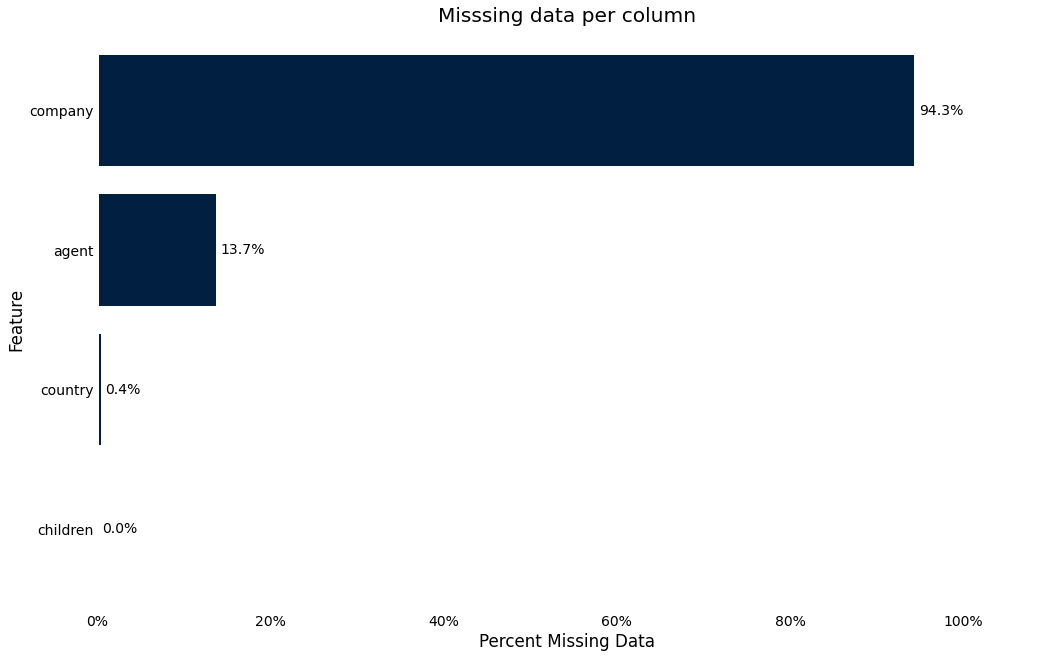

In [11]:
dataset.plot.missing_data()

# Hotel

A categorical feature with two levels:

 - City Hotel
 - Resort Hotel

In [15]:
df.hotel.value_counts(dropna=False)

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64